In [34]:
# import scraping as s
import util as u
%load_ext autoreload
%autoreload 2

import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt

In [3]:
from pymongo import MongoClient

In [4]:
import numpy as np

## Load data from MongoDB

SSH tunnel in thru command line:

```ssh -NL 12345:localhost:27017 kbfreder@```

Also start Mongo from command line -- log onto AWS

In [5]:
client = MongoClient(port=12345)

In [6]:
client.list_database_names()

['admin', 'local', 'song_db']

In [6]:
db = client.song_db

In [8]:
db.list_collection_names()

['lyrics_backup', 'lyrics', 'song_db']

In [7]:
# col = db.get_collection('song_db')
# col = db.create_collection('lyrics')
col = db.get_collection('lyrics')

In [8]:
col.estimated_document_count()

3042

In [9]:
text = []
for doc in col.find({}):
    text.append([doc['song'] + ' - ' + doc['artist'], 
                 doc['song'], doc['artist'], doc['album'], doc['genre'], doc['lyrics']])

In [10]:
len(text)

3042

In [11]:
u.pkl_this('Data/all_lyrics_181109.pkl', text)

## Clean data

In [3]:
# text = u.open_pkl('Data\rap_lyrics_181106.pkl')

In [16]:
lengths = [len(x[-1]) for x in text]

(array([  333.,  1177.,   714.,   399.,   262.,   101.,    35.,    12.,
            3.,     6.]),
 array([  5.00000000e+00,   8.12300000e+02,   1.61960000e+03,
          2.42690000e+03,   3.23420000e+03,   4.04150000e+03,
          4.84880000e+03,   5.65610000e+03,   6.46340000e+03,
          7.27070000e+03,   8.07800000e+03]),
 <a list of 10 Patch objects>)

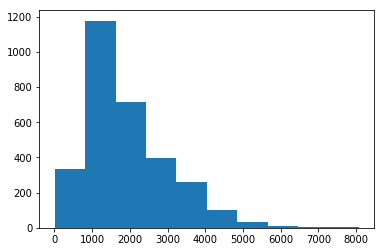

In [17]:
plt.hist(lengths)

In [18]:
lengths.sort()

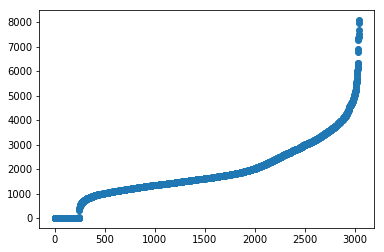

In [19]:
plt.plot(lengths, 'o')

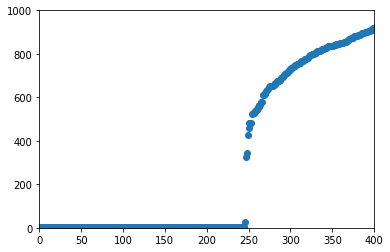

In [20]:
plt.plot(lengths, 'o')
plt.axis([0,400,0,1000]);

cut-off can be > 50

In [21]:
cleaned_text = [x for x in text if len(x[-1]) > 50]

In [22]:
len(cleaned_text)

2795

In [23]:
lengths = [len(x[-1]) for x in cleaned_text]

(array([  376.,  1258.,   451.,   366.,   216.,    80.,    28.,    11.,
            3.,     6.]),
 array([  327. ,  1102.1,  1877.2,  2652.3,  3427.4,  4202.5,  4977.6,
         5752.7,  6527.8,  7302.9,  8078. ]),
 <a list of 10 Patch objects>)

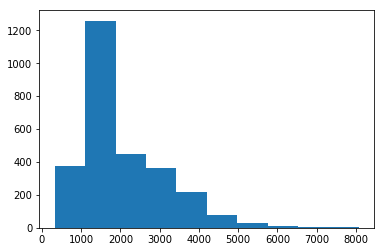

In [24]:
plt.hist(lengths)

In [25]:
lengths.sort()

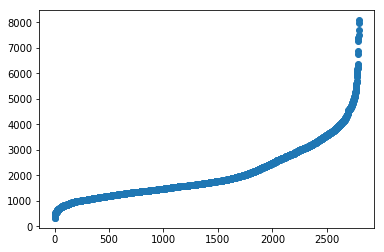

In [26]:
plt.plot(lengths, 'o')

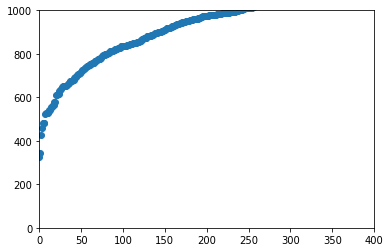

In [27]:
plt.plot(lengths, 'o')
plt.axis([0,400,0,1000]);

In [28]:
u.pkl_this('Data/cleaned_all_lyrics_181109.pkl', cleaned_text)

## Convert into dataframe

In [30]:
import pandas as pd

In [35]:
lyrics = [x[-1] for x in cleaned_text]
keys = [x[0] for x in cleaned_text]

songs = [x[1] for x in cleaned_text]
artists = [x[2] for x in cleaned_text]
albums = [x[3] for x in cleaned_text]
genre = [x[4] for x in cleaned_text]

df = pd.DataFrame([keys, songs, artists, albums, genre, lyrics]).transpose()
df.columns=(['ID', 'Song', 'Artist','Album','Genre','Lyrics'])

In [36]:
df.head()

,ID,Song,Artist,Album,Genre,Lyrics
0,Lucid Dreams - Juice WRLD,Lucid Dreams,Juice WRLD,JuiceWRLD 9 9 9,rap,"\n\n[Intro]\nEnviyon on the mix\nNo, no, no, n..."
1,Better Now - Post Malone,Better Now,Post Malone,​beerbongs & bentleys,rap,\n\n[Chorus]\nYou prolly think that you are be...
2,ZEZE - Kodak Black,ZEZE,Kodak Black,KB2,rap,\n\n[Intro]\nD.A. got that dope!\n\n[Chorus: T...
3,Drip Too Hard - Lil Baby,Drip Too Hard,Lil Baby,Drip Harder,rap,"\n\n[Intro]\nRun that back, Turbo\n\n[Verse 1:..."
4,Mo Bamba - Sheck Wes,Mo Bamba,Sheck Wes,MUDBOY,rap,\n\n[Intro]\n16yrold\nBitch!\nDaytrip took it ...


In [37]:
u.pkl_this('Data/all_lyrics_df_181109.pkl', df)